In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1+np.exp(-x))

In [2]:
from datetime import datetime      # datetime.now() 를 이용하여 학습 경과 시간 측정

class NeuralNetwork:
    
    def __init__(self, input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate):
        
        self.input_nodes = input_nodes
        self.hidden_nodes1 = hidden_nodes1
        self.hidden_nodes2 = hidden_nodes2
        self.output_nodes = output_nodes

        # 은닉층1 가중치  W2 = (784 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W21 = np.random.randn(self.input_nodes, self.hidden_nodes1) / np.sqrt(self.input_nodes/2)
        self.b21 = np.random.rand(self.hidden_nodes1)   
        
        # 은닉층2 가중치  W2 = (100 X 100) Xavier/He 방법으로 self.W2 가중치 초기화
        self.W22 = np.random.randn(self.hidden_nodes1, self.hidden_nodes2) / np.sqrt(self.hidden_nodes1/2)
        self.b22 = np.random.rand(self.hidden_nodes2)      
        
        # 출력층 가중치는 W3 = (100X10)  Xavier/He 방법으로 self.W3 가중치 초기화
        self.W3 = np.random.randn(self.hidden_nodes2, self.output_nodes) / np.sqrt(self.hidden_nodes2/2)
        self.b3 = np.random.rand(self.output_nodes)      
                        
        # 출력층 선형회귀 값 Z3, 출력값 A3 정의 (모두 행렬로 표시)
        self.Z3 = np.zeros([1,output_nodes])
        self.A3 = np.zeros([1,output_nodes])
        
        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z22 = np.zeros([1,hidden_nodes2])
        self.A22 = np.zeros([1,hidden_nodes2])

        # 은닉층 선형회귀 값 Z2, 출력값 A2 정의 (모두 행렬로 표시)
        self.Z21 = np.zeros([1,hidden_nodes1])
        self.A21 = np.zeros([1,hidden_nodes1])
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 정의 (모두 행렬로 표시)
        self.Z1 = np.zeros([1,input_nodes])    
        self.A1 = np.zeros([1,input_nodes])       
        
        # 학습률 learning rate 초기화
        self.learning_rate = learning_rate
        
    def feed_forward(self):  
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층1 선형회귀 값 Z21, 출력값 A21 계산    
        self.Z21 = np.dot(self.A1, self.W21) + self.b21
        self.A21 = sigmoid(self.Z21)

        # 은닉층2 선형회귀 값 Z22, 출력값 A22 계산    
        self.Z22 = np.dot(self.A21, self.W22) + self.b22
        self.A22 = sigmoid(self.Z22)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A22, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )    
    
    def loss_val(self):
        
        delta = 1e-7    # log 무한대 발산 방지
        
        # 입력층 선형회귀 값 Z1, 출력값 A1 계산
        self.Z1 = self.input_data
        self.A1 = self.input_data
        
        # 은닉층 선형회귀 값 Z21, 출력값 A21 계산    
        self.Z21 = np.dot(self.A1, self.W21) + self.b21
        self.A21 = sigmoid(self.Z21)

        # 은닉층 선형회귀 값 Z22, 출력값 A22 계산    
        self.Z22 = np.dot(self.A21, self.W22) + self.b22
        self.A22 = sigmoid(self.Z22)
        
        # 출력층 선형회귀 값 Z3, 출력값 A3 계산
        self.Z3 = np.dot(self.A22, self.W3) + self.b3
        self.A3 = sigmoid(self.Z3)
        
        return  -np.sum( self.target_data*np.log(self.A3 + delta) + (1-self.target_data)*np.log((1 - self.A3)+delta ) )
    
   
    # 정확도 측정함수
    def accuracy(self, test_data):
        
        matched_list = []
        not_matched_list = []
        
        # list which contains (index, label, prediction) value
        index_label_prediction_list = []

        # temp list which contains label and prediction in sequence
        temp_list = []
        
        for index in range(len(test_data)):
                        
            label = int(test_data[index, 0])
                        
            # one-hot encoding을 위한 데이터 정규화 (data normalize)
            data = (test_data[index, 1:] / 255.0 * 0.99) + 0.01
               
            # predict 를 위해서 vector 을 matrix 로 변환하여 인수로 넘겨줌
            predicted_num = self.predict(np.array(data, ndmin=2)) 
            # predicted_num = self.predict(data) 
        
            if label == predicted_num:
                matched_list.append(index)
            else:
                not_matched_list.append(index)
                
                temp_list.append(index)
                temp_list.append(label)
                temp_list.append(predicted_num)
                
                index_label_prediction_list.append(temp_list)
                
                temp_list = []
                
        print("Current Accuracy = ", 100*(len(matched_list)/(len(test_data))), " %")
        print("Correct = ", len(matched_list)," Wrong = ", len(not_matched_list))
              
        # return matched_list, not_matched_list
        # return len(matched_list), len(not_matched_list)
        return matched_list, not_matched_list, index_label_prediction_list

    def train(self, input_data, target_data):   # input_data : 784 개, target_data : 10개
        
        self.target_data = target_data    
        self.input_data = input_data
        
        # 먼저 feed forward 를 통해서 최종 출력값과 이를 바탕으로 현재의 에러 값 계산
        loss_val = self.feed_forward()
        
        # 출력층 loss 인 loss_4 구함
        loss_3 = (self.A3-self.target_data) * self.A3 * (1-self.A3)
                        
        # 출력층 가중치 W3, 출력층 바이어스 b3 업데이트
        self.W3 = self.W3 - self.learning_rate * np.dot(self.A22.T, loss_3)   
        
        self.b3 = self.b3 - self.learning_rate * loss_3
        
        # 은닉층2 loss 인 loss_22 구함        
        loss_22 = np.dot(loss_3, self.W3.T) * self.A22 * (1-self.A22)
        
        # 은닉층2 가중치 W22, 은닉층 바이어스 b22 업데이트
        self.W22 = self.W22 - self.learning_rate * np.dot(self.A21.T, loss_22)   
        
        self.b22 = self.b22 - self.learning_rate * loss_22

        # 은닉층1 loss 인 loss_2 구함        
        loss_21 = np.dot(loss_22, self.W22.T) * self.A21 * (1-self.A21)
        
        # 은닉층1 가중치 W21, 은닉층 바이어스 b21 업데이트
        self.W21 = self.W21 - self.learning_rate * np.dot(self.A1.T, loss_21)   
        
        self.b21 = self.b21 - self.learning_rate * loss_21
        
    def predict(self, input_data):        # input_data 는 행렬로 입력됨 즉, (1, 784) shape 을 가짐        
        
        Z21 = np.dot(input_data, self.W21) + self.b21
        A21 = sigmoid(Z21)

        Z22 = np.dot(A21, self.W22) + self.b22
        A22 = sigmoid(Z22)
        
        Z3 = np.dot(A22, self.W3) + self.b3
        A3 = sigmoid(Z3)
        
        predicted_num = np.argmax(A3)
    
        return predicted_num

    # obtain W and b
    def get_W_b(self):
        
        return self.W21, self.b21, self.W22, self.b22, self.W3, self.b3
    

In [3]:
# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 training data 읽어옴
training_data = np.loadtxt('./mnist_train.csv', delimiter=',', dtype=np.float32)

# 0~9 숫자 이미지가 784개의 숫자 (28X28) 로 구성되어 있는 test data 읽어옴
test_data = np.loadtxt('./mnist_test.csv', delimiter=',', dtype=np.float32)

In [4]:
print("training_data.shape = ", training_data.shape, " ,  test_data.shape = ", test_data.shape)

training_data.shape =  (60000, 785)  ,  test_data.shape =  (10000, 785)


In [5]:
print("training_data[0,0] = ", training_data[0,0], ",  test_data[0,0] = ", test_data[0,0])

print("len(training_data[0]) = ", len(training_data[0]), ",  len(test_data[0]) = ", len(test_data[0]))

training_data[0,0] =  5.0 ,  test_data[0,0] =  7.0
len(training_data[0]) =  785 ,  len(test_data[0]) =  785


In [6]:
input_nodes = 784
hidden_nodes1 = 200
hidden_nodes2 = 200
output_nodes = 10
learning_rate = 0.2
epochs = 20

# 손실함수 값을 저장할 list 생성
loss_val_list = []

nn = NeuralNetwork(input_nodes, hidden_nodes1, hidden_nodes2, output_nodes, learning_rate)

start_time = datetime.now()

for i in range(epochs):
    
    for step in range(len(training_data)):  # train
    
        # input_data, target_data normalize        
        target_data = np.zeros(output_nodes) + 0.01    
        target_data[int(training_data[step, 0])] = 0.99
    
        input_data = ((training_data[step, 1:] / 255.0) * 0.99) + 0.01
    
        nn.train( np.array(input_data, ndmin=2), np.array(target_data, ndmin=2) )
    
        if step % 10000 == 0:
            print("step = ", step,  ",  loss_val = ", nn.loss_val())
            
        # 손실함수 값 저장
        loss_val_list.append(nn.loss_val()) 
        
end_time = datetime.now() 
print("\nelapsed time = ", end_time - start_time) 

step =  0 ,  loss_val =  2.2103498512551667
step =  10000 ,  loss_val =  0.9299941531892145
step =  20000 ,  loss_val =  1.1652813506388149
step =  30000 ,  loss_val =  1.3577752573149524
step =  40000 ,  loss_val =  1.4399562840917224
step =  50000 ,  loss_val =  1.4266866960151785
step =  0 ,  loss_val =  1.2613790977320272
step =  10000 ,  loss_val =  1.4575544880483884
step =  20000 ,  loss_val =  1.3936085744581836
step =  30000 ,  loss_val =  1.4905311331112938
step =  40000 ,  loss_val =  1.5498115498953713
step =  50000 ,  loss_val =  1.4699068983731574
step =  0 ,  loss_val =  1.4404005185374753
step =  10000 ,  loss_val =  1.5306357342036119
step =  20000 ,  loss_val =  1.4724762780676304
step =  30000 ,  loss_val =  1.5642131700561295
step =  40000 ,  loss_val =  1.6035362676427947
step =  50000 ,  loss_val =  1.5168093008477135
step =  0 ,  loss_val =  1.4880763082330384
step =  10000 ,  loss_val =  1.4902500865228976
step =  20000 ,  loss_val =  1.4811588607368158
step =  

In [7]:
# nn.accuracy(test_data)    # epochs == 1 인 경우

(true_list_3, false_list_3, index_label_prediction_list) = nn.accuracy(test_data) 
np.save("true_list3", np.array(true_list_3))
np.save("false_list3", np.array(false_list_3))
np.save("index_label_prediction_list3", np.array(index_label_prediction_list))

Current Accuracy =  97.22  %
Correct =  9722  Wrong =  278


## 가중치와 바이어스 save & load

In [8]:
# print(loss_val_list)
(W21,  b21, W22,  b22, W3, b3)=nn.get_W_b()
# obj.get_W_b()
np.save("W21", np.array(W21))
np.save("b21", np.array(b21))
np.save("W22", np.array(W22))
np.save("b22", np.array(b22))
np.save("W3", np.array(W3))
np.save("b3", np.array(b3))
np.save("loss_val_list3", np.array(loss_val_list))

In [ ]:
load_data = np.load("W3.npy")
# print(load_data)

## Neural Network기반 Deep Learning architecture 정확도 평가 (mnist_test.csv)

In [9]:
load_data = np.load("false_list3.npy")
print(len(load_data))

278


## 잘못 예측한 데이터 

In [10]:
import pandas as pd

load_data = np.load("index_label_prediction_list3.npy")
# print(load_data)
df = pd.DataFrame(load_data,columns = ['index','label','predict'])
# df.columns = ['index','label','predict']
df.to_csv("index_label_prediction_list3.csv")
df

,index,label,predict
0,149,2,4
1,247,4,6
2,259,6,0
3,290,8,4
4,321,2,7
...,...,...,...
273,9904,2,0
274,9922,4,9
275,9941,5,8
276,9944,3,8


## loss_val 손실함수 추세 

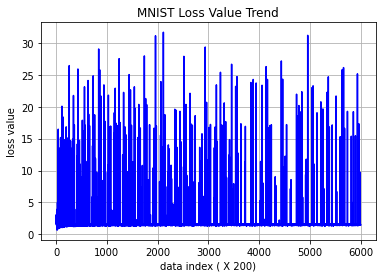

In [11]:
# 손실함수 추세 확인
# loss_val_list = np.load("loss_val_list3.npy")

x_data_list = [ index for index in range(len(training_data)) ]
Y_DATA_LIST = []

for index in range(0, len(loss_val_list), 200):
    Y_DATA_LIST.append(loss_val_list[index])
    
plt.title('MNIST Loss Value Trend')
plt.xlabel('data index ( X 200)')
plt.ylabel('loss value')
plt.grid()
#plt.ylim(2.1, 7.1)
#plt.plot(x_data_list, loss_val_list, color='b')
plt.plot(Y_DATA_LIST, color='b')
plt.show()
